# A deep exploring in the Seattle AirBnb Dataset

##  Business questions:
This notebook tries to analyze the "Seattle AirBnb Open Data"



These are the five main  questions for our analysis:
1. What type of properties has the highest prices?
2. Does "host_response_time" impact on the location's number of reviewers?
3. Which neighbourhoods got the most reviews?
4. What factors have the most impact on price?
5. How well can we predict the price and the number of bedrooms?



## Data Understanding


Seattle dataset: * Listings, including full descriptions.

For this analysis, we are focusing the Listings data because that is needed to address the our questions.



###  Libraries needed

In [1]:
# libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import re



In [3]:
# listings.csv Seattle Airbnb dataset
df = pd.read_csv('listings.csv')

# The dataset shape
print(df.shape,'\n')

df.head(5)

(4335, 74) 



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20201025051148,2020-10-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22
1,9419,https://www.airbnb.com/rooms/9419,20201025051148,2020-10-25,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,str-opli-19-003039,f,8,0,8,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20201025051148,2020-10-25,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,20201025051148,2020-10-25,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,20201025051148,2020-10-25,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.85


In [4]:
#The dataset columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Below are all of the columns in the dataset and their data type.

There are five general themes for the variables: host-related, review-related, property-related, listing-related, or location-related.

In [5]:
# Remove $ from the price and convert it into float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].sort_values(ascending=False)

1806    3503.0
1676    1650.0
264     1500.0
1183    1304.0
973     1079.0
         ...  
3546      16.0
3547      16.0
3549      16.0
3550      16.0
3552      16.0
Name: price, Length: 4335, dtype: float64

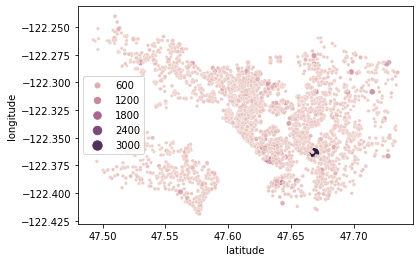

In [6]:
# Show the places based on Logitude and Latitude and price
sns.scatterplot(data=df, x="latitude", y="longitude",hue=df['price'].tolist(),size=df['price'].tolist(), sizes=(10, 100));

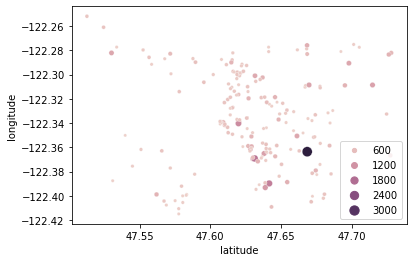

In [7]:
# Show the places that their price is greater that $300
df1 = df[df['price'] > 300]
sns.scatterplot(data=df1[['latitude','longitude','price']], x="latitude", y="longitude",hue=df1.price.tolist(),size=df1.price.tolist(), sizes=(10, 100)); 

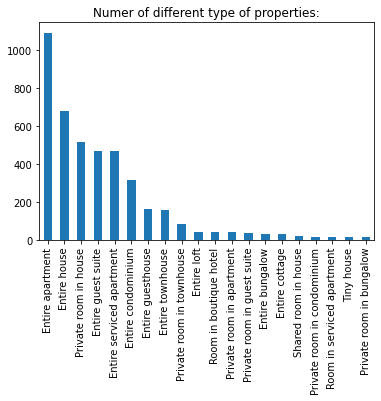

In [8]:
# Number of different type of properties
status_vals = df.property_type.value_counts()
(status_vals[:20]).plot(kind="bar");
plt.title("Numer of different type of properties:");

###  1. What type of properties has the highest prices?

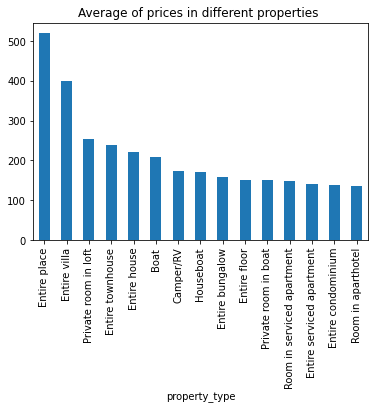

In [9]:
# Average price of different type of properties
status_vals2 = df.groupby(['property_type']).mean()['price'].sort_values(ascending=False)
(status_vals2[:15]).plot(kind="bar");
plt.title("Average of prices in different properties ");

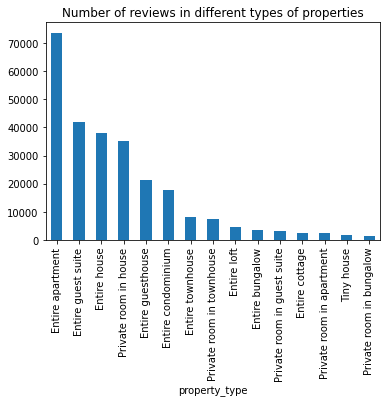

In [10]:
# Number of reviews in different types of properties
status_vals2 = df.groupby(['property_type']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals2[:15]).plot(kind="bar");
plt.title("Number of reviews in different types of properties");

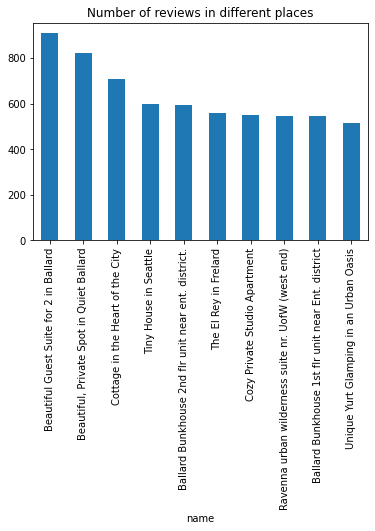

In [11]:
# Number of reviews in different places
status_vals2 = df.groupby(['name']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals2[:10]).plot(kind="bar");
plt.title('Number of reviews in different places');

##  2. Does "host_response_time" impact on the location's number of reviewers?

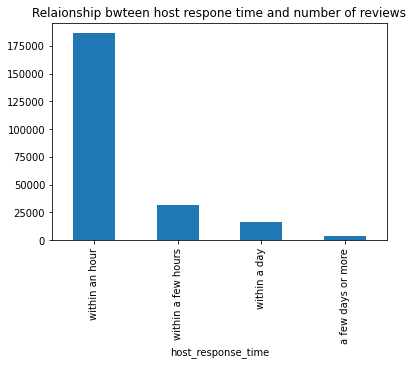

In [12]:
# Relationship bwteen host respone time and number of reviews
status_vals3 = df.groupby(['host_response_time']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:10]).plot(kind="bar");
plt.title("Relaionship bwteen host respone time and number of reviews");

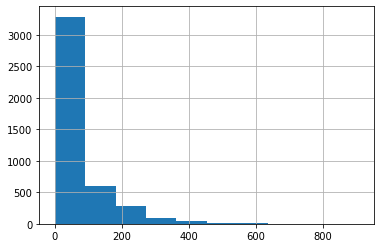

In [13]:
# Histogram of number of reviews
status_vals = df['number_of_reviews'].hist()


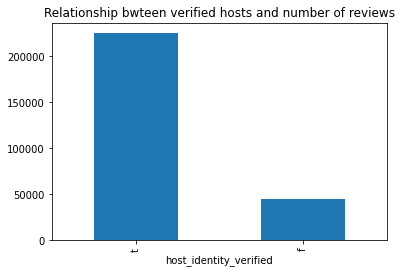

In [14]:
# Relationship bwteen verified hosts and number of reviews
status_vals3 = df.groupby(['host_identity_verified']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:20]).plot(kind="bar");
plt.title("Relationship bwteen verified hosts and number of reviews");

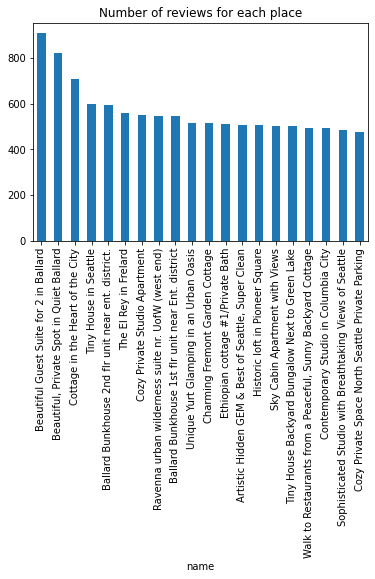

In [15]:
# Number of reviews for each place
status_vals3 = df.groupby(['name']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:20]).plot(kind="bar");
plt.title("Number of reviews for each place");

## 3. Which neighbourhoods got the most reviews?

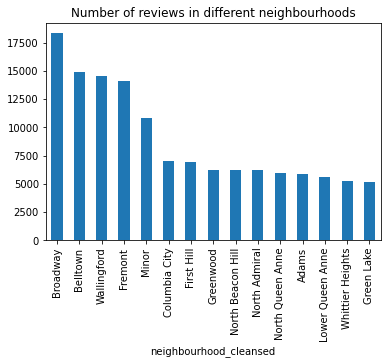

In [16]:

status_vals3 = df.groupby(['neighbourhood_cleansed']).sum()['number_of_reviews'].sort_values(ascending=False)
(status_vals3[:15]).plot(kind="bar");
plt.title("Number of reviews in different neighbourhoods");

## 4. What factors have the most impact on price?

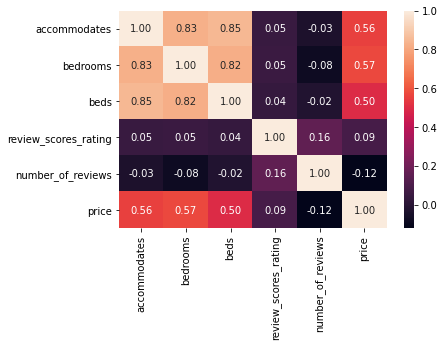

In [17]:
# Impact of different factors on price
cols = ['accommodates','bedrooms','beds','review_scores_rating', 'number_of_reviews', 'price']

sns.heatmap(df[cols].corr(), annot=True, fmt=".2f");

In [18]:
# Fining how many places have Wifi?

tags = df['amenities'].apply(lambda col: re.findall(r'"(.*?)"', col)).apply(pd.Series)
tags = tags.rename(columns = lambda x : 'seb' + str(x))
print(tags.shape)
#tags.head(10)


(4335, 60)


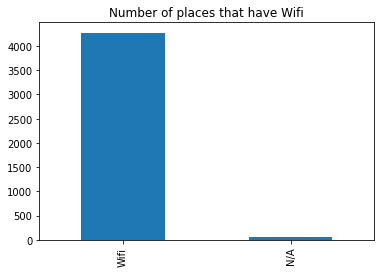

In [19]:
facility = "Wifi"
df['facilities'] = df['amenities'].apply(lambda col: tuple(re.findall(facility, col)))
status_vals = df['facilities'].value_counts()
#status_vals
Y = re.findall(r'"(.*?)"', str(status_vals.axes[0][0]))
status_vals[facility] = status_vals.values[0]
Y = re.findall(r'"(.*?)"', str(status_vals.axes[0][1]))
status_vals['N/A'] = status_vals.values[1]

status_vals[[facility,'N/A']].plot(kind="bar");
plt.title("Number of places that have Wifi");

## 5. How well can we predict the price and the number of bedrooms?

The r-squared score for the model on the training data is 0.37250098382437324 on 2408 values. The RMSE was 10941.791692856088
The r-squared score for the model on the test data is 0.49259446074892077 on 1032 values.  The RMSE was 5809.0479881620695


C:\Users\sabal\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0, 0.5, 'Predicted values')

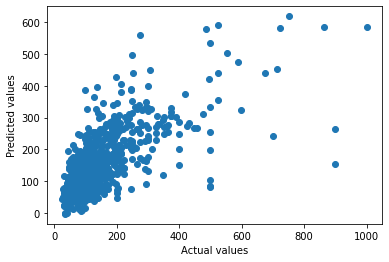

In [20]:
## Prices prediction

sal_rm = df.dropna(subset=['price'], axis=0)
sal_rm = sal_rm[:3440]

X = sal_rm[['accommodates', 'bedrooms', 'beds', 'room_type','neighbourhood_cleansed',
            'host_is_superhost' ]]

num_vars= X.select_dtypes(include=['int','float']).copy().columns 
cat_vars = X.select_dtypes(include=['object']).copy().columns

for col in num_vars:

    X[col].fillna((X[col].mean()), inplace=True)


for var in  cat_vars:

    X[var].fillna((X[var].mode()), inplace=True)
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

y = sal_rm['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 


lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_train_preds = lm_model.predict(X_train)
print("The r-squared score for the model on the training data is {} on {} values. The RMSE was {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for the model on the test data is {} on {} values.  The RMSE was {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

C:\Users\sabal\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


The r-squared score for the model on the training data is 0.6432703294610551 on 2408 values. The RMSE was 0.28945182724252494
The r-squared score for the model on the test data is 0.691686742277281 on 1032 values.  The RMSE was 0.28875968992248063


Text(0, 0.5, 'Predicted values')

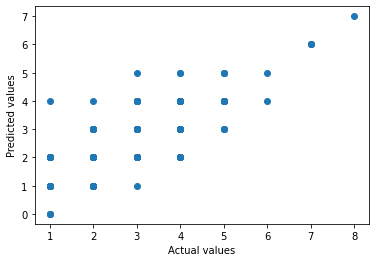

In [21]:
## Number of bedrooms prediction

sal_rm = df.dropna(subset=['bedrooms'], axis=0)
sal_rm = sal_rm[:3440]

X = sal_rm[['accommodates', 'price', 'room_type','neighbourhood_cleansed','latitude','longitude']]

num_vars= X.select_dtypes(include=['int','float']).copy().columns 
cat_vars = X.select_dtypes(include=['object']).copy().columns

for col in num_vars:
    X[col].fillna((X[col].mean()), inplace=True)

for var in  cat_vars:
    X[var].fillna((X[var].mode()), inplace=True)
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

y = sal_rm['bedrooms']

   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_train_preds = np.round(lm_model.predict(X_train))
print("The r-squared score for the model on the training data is {} on {} values. The RMSE was {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = np.round(lm_model.predict(X_test))
print("The r-squared score for the model on the test data is {} on {} values.  The RMSE was {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')